In [1]:
%pylab inline

import sys
import numpy as np
import Nio
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

sys.path.append('../pytrack/')
from detector import Center
from tracker import *

try:
    import cPickle as pickle
except ImportError:
    import pickle

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
tracks = pickle.load(open("../pytrack/tracks.pickle", "rb"))

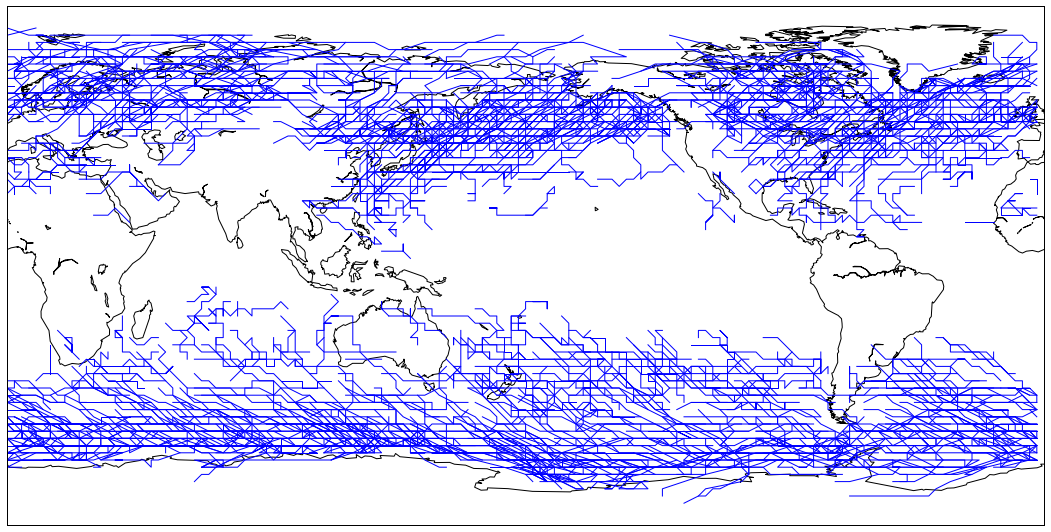

1203


In [3]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
m.drawcoastlines()

counter = 0
for t in tracks.tracks:
    lats = []
    lons = []
    
    if Center.abs_dist(t.centers[0], t.centers[-1]) >= 1000. and len(t.centers) >= 8:
        for c in t.centers:
            lats.append(c.lat)
            lons.append(c.lon)
            
        # lons = [l-360. if l>180. else l for l in lons]
        
        # Trick to remove the horizontal streaks
        # http://pythology.blogspot.com/2014/02/how-to-avoid-jumping-line-plots-in.html
        segment = np.vstack( (lons,lats))
        bleft = 0.
        bright = 360.
        segment[0,segment[0]> bright] -= 360.                                                                 
        segment[0,segment[0]< bleft]  += 360.
        threshold = 90.                                                                                      
        isplit = np.nonzero(np.abs(np.diff(segment[0])) > threshold)[0]                                                                                         
        subsegs = np.split(segment,isplit+1,axis=+1)

        for seg in subsegs:
            x,y = m(seg[0], seg[1])
            m.plot(x, y, linewidth=1, color='b')
        
        counter = counter + 1
        
plt.show()

print(counter)